# Week 2: Tackle Overfitting with Data Augmentation

Welcome to this assignment! As in the previous week, you will be using the famous `cats vs dogs` dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities, more so this time around since Keras provides excellent support for augmenting image data.

You will also need to create the helper functions to move the images around the filesystem as you did last week, so if you need to refresh your memory with the `os` module be sure to take a look a the [docs](https://docs.python.org/3/library/os.html).

Let's get started!

_**NOTE:** To prevent errors from the autograder, please avoid editing or deleting non-graded cells in this notebook . Please only put your solutions in between the `### START CODE HERE` and `### END CODE HERE` code comments, and refrain from adding any new cells._

In [1]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

# Preparing the data
### As done last exercise, leaving in comment

In [2]:
# print(len(os.listdir('./tmp/PetImages/Cat/')))
# print(len(os.listdir('./tmp/PetImages/Dog/')))

# # Expected Output:
# # 12501
# # 12501


# # Use os.mkdir to create your directories
# # You will need a directory for cats-v-dogs, and subdirectories for training
# # and testing. These in turn will need subdirectories for 'cats' and 'dogs'

# # Define root directory
# root_dir = './tmp/cats-v-dogs'

# if os.path.exists(root_dir):
#   shutil.rmtree(root_dir)

# try:
#     #YOUR CODE GOES HERE
#     os.mkdir('./tmp/cats-v-dogs')
#     os.mkdir('./tmp/cats-v-dogs/training')
#     os.mkdir('./tmp/cats-v-dogs/testing')
#     os.mkdir("./tmp/cats-v-dogs/training/cats/")
#     os.mkdir("./tmp/cats-v-dogs/testing/cats/")
#     os.mkdir("./tmp/cats-v-dogs/training/dogs/")
#     os.mkdir("./tmp/cats-v-dogs/testing/dogs/")

# except OSError:
#     pass




# # Write a python function called split_data which takes
# # a SOURCE directory containing the files
# # a TRAINING directory that a portion of the files will be copied to
# # a TESTING directory that a portion of the files will be copie to
# # a SPLIT SIZE to determine the portion
# # The files should also be randomized, so that the training set is a random
# # X% of the files, and the test set is the remaining files
# # SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# # Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# # and 10% of the images will be copied to the TESTING dir
# # Also -- All images should be checked, and if they have a zero file length,
# # they will not be copied over
# #
# # os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# # os.path.getsize(PATH) gives you the size of the file
# # copyfile(source, destination) copies a file from source to destination
# # random.sample(list, len(list)) shuffles a list
# def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# # YOUR CODE STARTS HERE
#     fileslist = []
#     #creating list of files
#     for filename in os.listdir(SOURCE):
#         file = SOURCE + filename
#         if (os.path.getsize(file) > 0):
#             fileslist.append(filename)
#         else:
#             print(file +  " is zero length, so ignoring.")
    
#     training_length = int(SPLIT_SIZE*len(fileslist))
#     testing_length = int(len(fileslist) - training_length)
#     sample = random.sample(fileslist,len(fileslist))
#     training_list = sample[0:training_length]
#     testing_list = sample[-testing_length:]
    
#     for filename in training_list:
#         curr_file = SOURCE + filename
#         dest = TRAINING + filename
#         copyfile(curr_file,dest)
    
#     for filename in testing_list:
#         curr_file = SOURCE + filename
#         dest = TESTING + filename
#         copyfile(curr_file,dest)
#         # YOUR CODE ENDS HERE


# CAT_SOURCE_DIR = "./tmp/PetImages/Cat/"
# TRAINING_CATS_DIR = "./tmp/cats-v-dogs/training/cats/"
# TESTING_CATS_DIR = "./tmp/cats-v-dogs/testing/cats/"
# DOG_SOURCE_DIR = "./tmp/PetImages/Dog/"
# TRAINING_DOGS_DIR = "./tmp/cats-v-dogs/training/dogs/"
# TESTING_DOGS_DIR = "./tmp/cats-v-dogs/testing/dogs/"

# split_size = .9
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
# split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# # Expected output
# # 666.jpg is zero length, so ignoring
# # 11702.jpg is zero length, so ignoring


# print(len(os.listdir('./tmp/cats-v-dogs/training/cats/')))
# print(len(os.listdir('./tmp/cats-v-dogs/training/dogs/')))
# print(len(os.listdir('./tmp/cats-v-dogs/testing/cats/')))
# print(len(os.listdir('./tmp/cats-v-dogs/testing/dogs/')))

# # Expected output:
# # 11250
# # 11250
# # 1250
# # 1250

Now that you have successfully organized the data in a way that can be easily fed to Keras' `ImageDataGenerator`, it is time for you to code the generators that will yield batches of images, both for training and validation. For this, complete the `train_val_generators` function below.

Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the `flow_from_directory` method allows you to standarize this by defining a tuple called `target_size` that will be used to convert each image to this target resolution. **For this exercise use a `target_size` of (150, 150)**.

In [3]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255. ,
                                     rotation_range=40,
                                     width_shift_range=0.3,
                                     height_shift_range=0.3,
                                     shear_range=0.2,
                                     zoom_range=0.5,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255. ,
                                          rotation_range=40,
                                          width_shift_range=0.3,
                                          height_shift_range=0.3,
                                          shear_range=0.2,
                                          zoom_range=0.5,
                                          horizontal_flip=True,
                                          fill_mode='nearest'
  )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [4]:
# grader-required-cell

# Test your generators
TRAINING_DIR = "./tmp/cats-v-dogs/training/"
VALIDATION_DIR = "./tmp/cats-v-dogs/testing/"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Expected Output:**

```
Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
```


One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below which should return a Keras' `Sequential` model.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `class_mode` you defined in the previous exercise, which should also be compatible with the output of your network. You can tell if they aren't compatible if you get an error during training.

**Note that you should use at least 3 convolution layers to achieve the desired performance.**

In [5]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
      
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

Now it is time to train your model!

Note: You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [6]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
 76/225 [=========>....................] - ETA: 1:55 - loss: 0.6928 - accuracy: 0.5312

C:\Users\GILAD\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 [==============================] - 189s 834ms/step - loss: 0.6755 - accuracy: 0.5728 - val_loss: 0.6605 - val_accuracy: 0.6064
Epoch 2/20
225/225 [==============================] - 189s 840ms/step - loss: 0.6421 - accuracy: 0.6257 - val_loss: 0.6155 - val_accuracy: 0.6376
Epoch 3/20
225/225 [==============================] - 189s 839ms/step - loss: 0.6172 - accuracy: 0.6556 - val_loss: 0.5855 - val_accuracy: 0.6840
Epoch 4/20
225/225 [==============================] - 190s 844ms/step - loss: 0.5860 - accuracy: 0.6897 - val_loss: 0.5984 - val_accuracy: 0.6800
Epoch 5/20
225/225 [==============================] - 197s 876ms/step - loss: 0.5734 - accuracy: 0.6979 - val_loss: 0.5549 - val_accuracy: 0.7136
Epoch 6/20
225/225 [==============================] - 205s 909ms/step - loss: 0.5592 - accuracy: 0.7086 - val_loss: 0.5466 - val_accuracy: 0.7168
Epoch 7/20
225/225 [==============================] - 204s 906ms/step - loss: 0.5439 - accuracy: 0.7232 - val_loss: 0.5464 - val_accura

Once training has finished, you can run the following cell to check the training and validation accuracy achieved at the end of each epoch.

**To pass this assignment, your model should achieve a training and validation accuracy of at least 80% and the final testing accuracy should be either higher than the training one or have a 5% difference at maximum**. If your model didn't achieve these thresholds, try training again with a different model architecture, remember to use at least 3 convolutional layers or try tweaking the image augmentation process.

You might wonder why the training threshold to pass this assignment is significantly lower compared to last week's assignment. Image augmentation does help with overfitting but usually this comes at the expense of requiring more training time. To keep the training time reasonable, the same number of epochs as in the previous assignment are kept. 

However, as an optional exercise you are encouraged to try training for more epochs and to achieve really good training and validation accuracies.

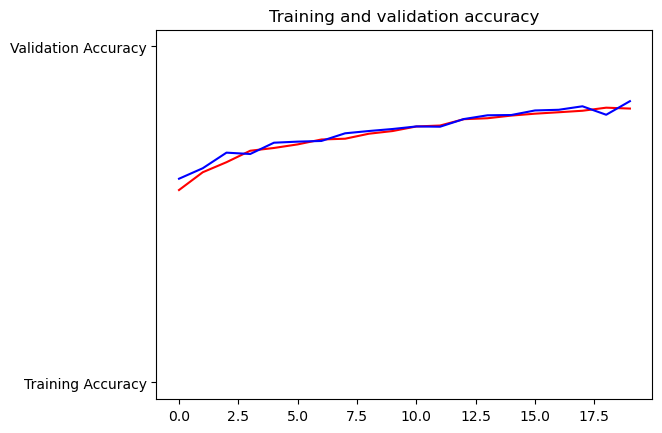

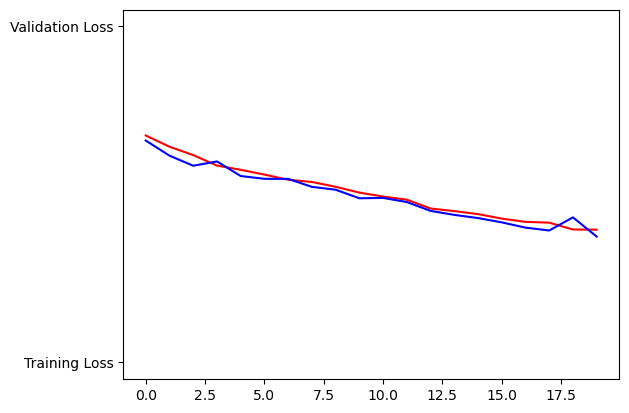

In [7]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

**Congratulations on finishing this week's assignment!**

You have successfully implemented a convolutional neural network that classifies images of cats and dogs, along with the helper functions needed to pre-process the images!

**Keep it up!**